In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [8]:
df = pd.read_csv('Customer_telecom.csv')
df = df.drop(columns=['state', 'area code', 'phone number'])
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploratory analysis

[Text(0, 0, '2850'), Text(0, 0, '483')]

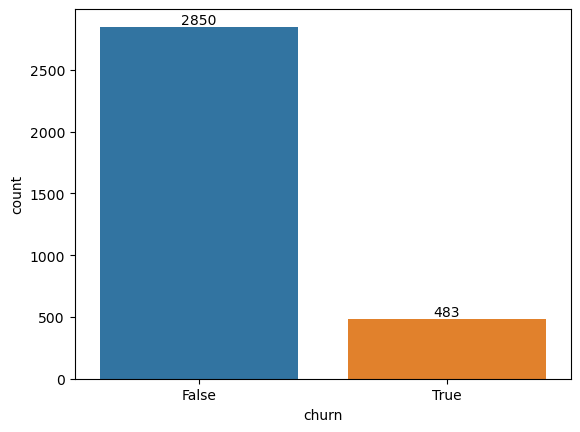

In [9]:
ax = sns.countplot(x='churn',data=df)
ax.bar_label(ax.containers[0])

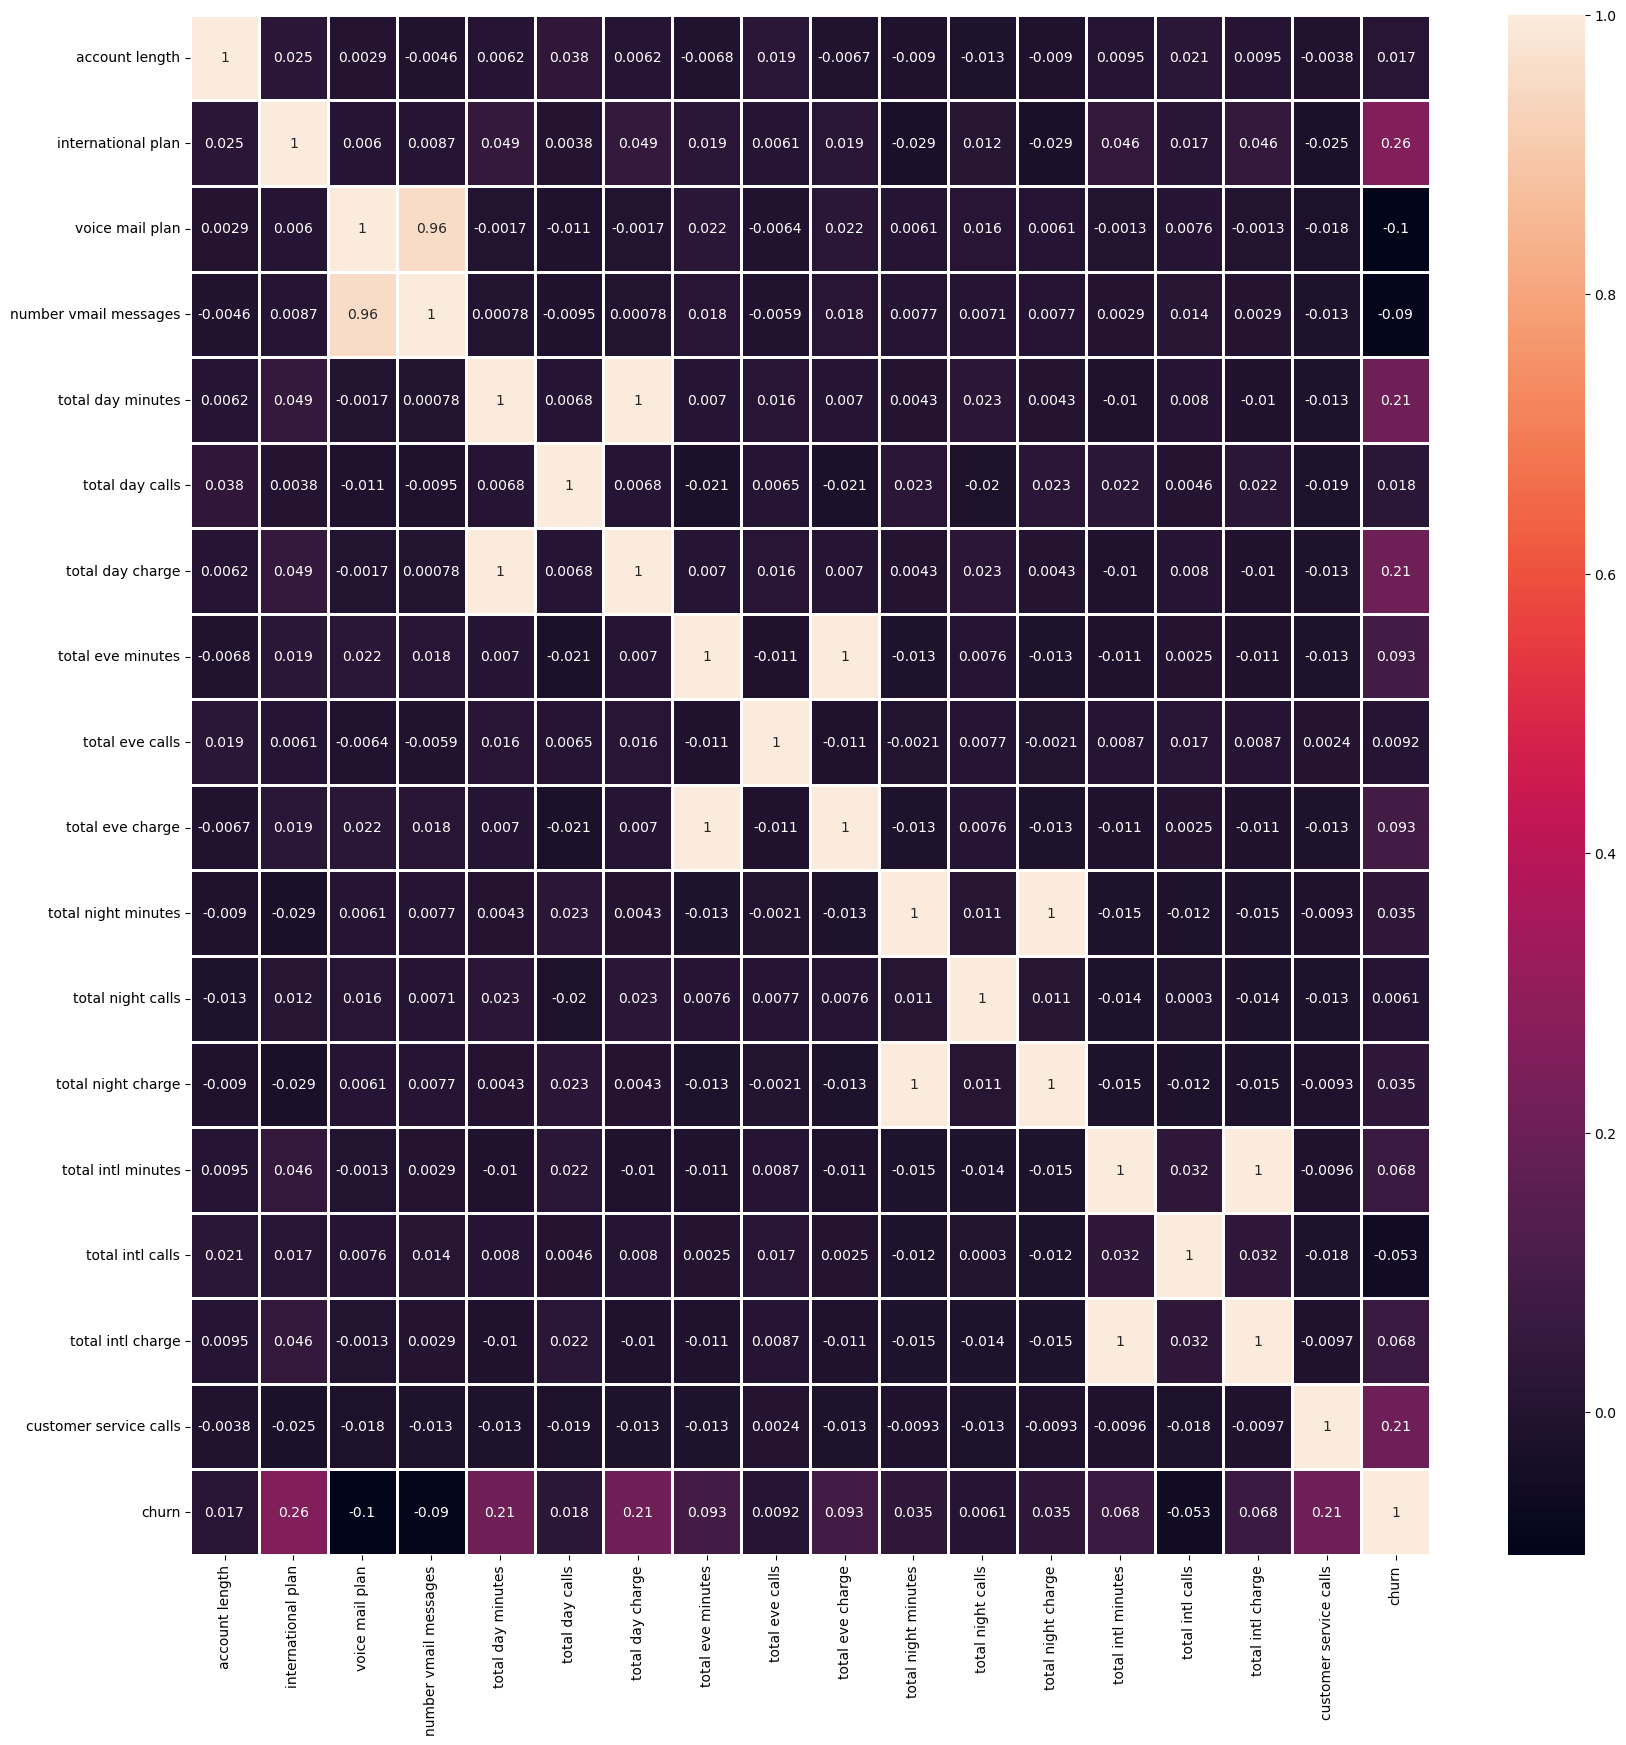

In [10]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(20,20))    
sns.heatmap(corrMatrix, annot=True, linewidths=.75, ax=ax)
plt.show()

## Model development and performance evaluation

In [11]:
y_data = df['churn']
x_data = df.drop('churn', axis = 1)

In [12]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
model = LogisticRegression()

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_training_data)
X_test = sc.transform(x_test_data)

###  Simple logistic regression

In [14]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_training_data)

y_pred_lr = logreg.predict(X_test)

In [15]:
cm1 = confusion_matrix(y_test_data, y_pred_lr)
print(cm1)
print(classification_report(y_test_data, y_pred_lr))

[[834  23]
 [117  26]]
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       857
        True       0.53      0.18      0.27       143

    accuracy                           0.86      1000
   macro avg       0.70      0.58      0.60      1000
weighted avg       0.83      0.86      0.83      1000



### LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_training_data)
X_test = lda.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_training_data)
y_pred_lda = classifier.predict(X_test)

In [18]:
cm2 = confusion_matrix(y_test_data, y_pred_lda)
print(cm2)
print(classification_report(y_test_data, y_pred_lda))

[[847  10]
 [125  18]]
              precision    recall  f1-score   support

       False       0.87      0.99      0.93       857
        True       0.64      0.13      0.21       143

    accuracy                           0.86      1000
   macro avg       0.76      0.56      0.57      1000
weighted avg       0.84      0.86      0.82      1000



### QDA

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_training_data)
y_pred_qda = model.predict(X_test)

In [20]:
cm3 = confusion_matrix(y_test_data, y_pred_qda)
print(cm3)
print(classification_report(y_test_data, y_pred_qda))

[[822  35]
 [109  34]]
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       857
        True       0.49      0.24      0.32       143

    accuracy                           0.86      1000
   macro avg       0.69      0.60      0.62      1000
weighted avg       0.83      0.86      0.83      1000

